
Exploratory Data Analysis (EDA) is a crucial step in understanding the characteristics of your dataset. 
Here's a basic EDA for the given CSV data:

1. **Check for Missing Values:**
   - Ensure there are no missing values in any of the columns.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv("../data/persoanl factor.csv")

# Check for missing values
print(data.isnull().sum())

Score                                                                                   0
Age                                                                                     0
Gender                                                                                  0
Family type                                                                             0
Literacy in family (here, educated means they have obtained basic education atleast)    0
Family income                                                                           0
Fathers' occupation                                                                     0
Residential area /place of living                                                       0
Type of school                                                                          0
Transportation to the school                                                            0
1. Are you attending school regularly?                                                  0
2. Do you 

In [3]:
data.head()

,Score,Age,Gender,Family type,"Literacy in family (here, educated means they have obtained basic education atleast)",Family income,Fathers' occupation,Residential area /place of living,Type of school,Transportation to the school,1. Are you attending school regularly?,2. Do you bunk class regularly?,3. Are you feel fear to go to school?
0,91,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",private job,urban area,private school,by peronal vehicle,Yes,No,No
1,90,17,Male,Joint family,both the parents are well educated,"40,001 to 60,000",govt job,urban area,grant in aid school,by school bus,Yes,No,No
2,80,17,Male,Joint family,both the parents are well educated,"upto 20,000",private job,urban area,private school,by peronal vehicle,Yes,No,No
3,80,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",self-employee,urban area,grant in aid school,by peronal vehicle,Yes,No,No
4,80,17,Male,Joint family,both the parents are well educated,"20,001 to 40,000",private job,urban area,grant in aid school,by peronal vehicle,Yes,No,No


2. **Summary Statistics:**
   - Obtain basic statistics for numerical columns like Score, Age, and Family income.

In [4]:
# Summary statistics
print(data.describe())

             Score          Age
count  3034.000000  3034.000000
mean     77.506592    16.350033
std       9.735817     0.477059
min      51.000000    16.000000
25%      72.000000    16.000000
50%      80.000000    16.000000
75%      83.000000    17.000000
max      98.000000    17.000000


3. **Distribution of Categorical Variables:**
   - Explore the distribution of categorical variables like Gender, Family type, Fathers' occupation, Residential area, Type of school, and Transportation.

In [5]:
# Distribution of categorical variables
for column in ['Gender', 'Family type', 'Fathers\' occupation', 'Residential area /place of living', 'Type of school', 'Transportation to the school']:
    print(data[column].value_counts())
    print("--"*50)


Gender
Male      2310
Female     724
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Family type
Joint family      1893
Nuclear family    1141
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Fathers' occupation
private job      2171
govt job          545
self-employee     206
business          112
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Residential area /place of living
urban area    2114
Rural area     920
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Type of school
grant in aid school    1661
private school         1373
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Transportation to t

4. **Correlation Analysis:**
   - Check the correlation between numerical variables.


In [6]:
# data_encoded = pd.get_dummies(data, columns=['Family income','Literacy in family (here, educated means they have obtained basic education atleast)','Gender', 'Family type', 'Fathers\' occupation', 'Residential area /place of living', 'Type of school', 'Transportation to the school'])

# binary_columns= list(data_encoded.columns)[2:]

# # Manually encode binary columns as 0 and 1
# data_encoded[binary_columns] = data_encoded[binary_columns].replace({'No': 0, 'Yes': 1})

# # Create a correlation matrix
# correlation_matrix = data_encoded.corr()

# # Create a heatmap
# plt.figure(figsize=(14, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.savefig("myImagePDF.pdf", format="pdf")
# plt.show()

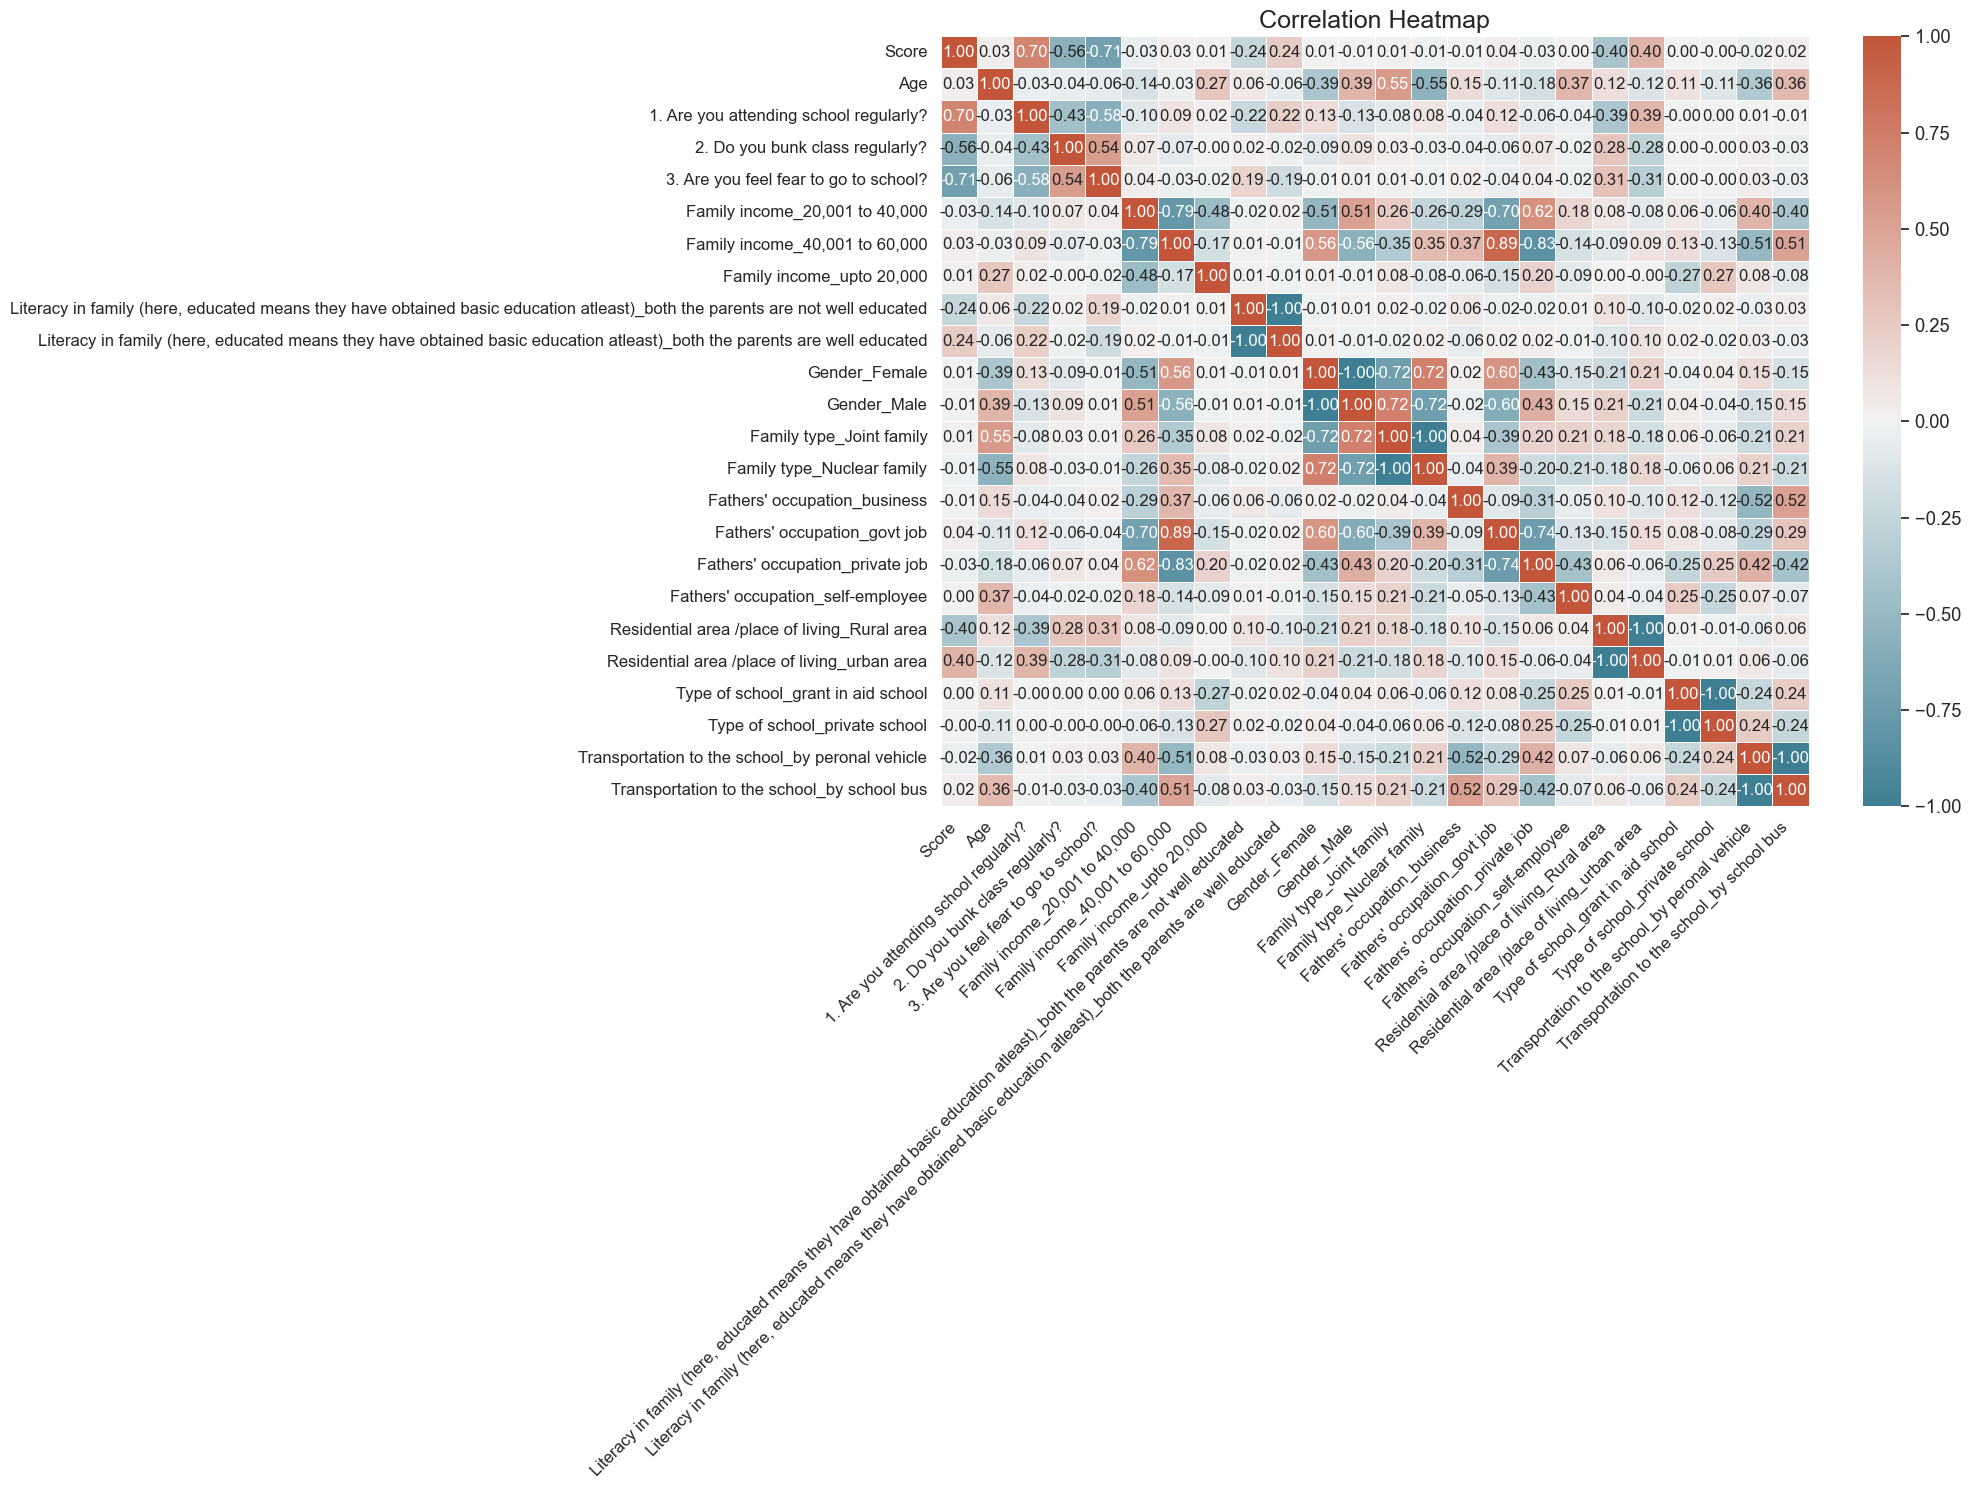

In [7]:
# Feature Engineering
# Convert categorical columns to one-hot encoding
categorical_columns = ['Family income', 'Literacy in family (here, educated means they have obtained basic education atleast)',
                        'Gender', 'Family type', 'Fathers\' occupation', 'Residential area /place of living',
                        'Type of school', 'Transportation to the school']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Manually encode binary columns as 0 and 1
binary_columns = list(data_encoded.columns)[2:]
data_encoded[binary_columns] = data_encoded[binary_columns].replace({'No': 0, 'Yes': 1})

# Create a correlation matrix
correlation_matrix = data_encoded.corr()

# Set up a more advanced heatmap
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)  # Adjust font size
sns.set_style("whitegrid")
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Choose a diverging color palette

# Create a heatmap with more advanced formatting
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, annot_kws={"size": 12})

# Customize plot aesthetics
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Save the heatmap to a PDF file
heatmap.get_figure().savefig("personal factor.pdf", format="pdf", bbox_inches='tight')

# Display the heatmap
plt.show()


In [8]:
threshold = 0.2  # You can adjust this threshold as needed

# Calculate correlations with 'Score' column
correlation_with_score = correlation_matrix['Score']

# Filter columns based on the threshold
significant_columns = correlation_with_score[(correlation_with_score) > threshold].index

# Display significant columns
print("Columns with correlation above threshold:")
print(significant_columns)

Columns with correlation above threshold:
Index(['Score', '1. Are you attending school regularly?',
       'Literacy in family (here, educated means they have obtained basic education atleast)_both the parents are well educated',
       'Residential area /place of living_urban area'],
      dtype='object')


In [8]:
data_encoded.head()

,Score,Age,1. Are you attending school regularly?,2. Do you bunk class regularly?,3. Are you feel fear to go to school?,"Family income_20,001 to 40,000","Family income_40,001 to 60,000","Family income_upto 20,000","Literacy in family (here, educated means they have obtained basic education atleast)_both the parents are not well educated","Literacy in family (here, educated means they have obtained basic education atleast)_both the parents are well educated",...,Fathers' occupation_govt job,Fathers' occupation_private job,Fathers' occupation_self-employee,Residential area /place of living_Rural area,Residential area /place of living_urban area,Type of school_grant in aid school,Type of school_private school,Transportation to the school_by peronal vehicle,Transportation to the school_by school bus,TotalFamilyIncome
0,91,17,1,0,0,True,False,False,False,True,...,False,True,False,False,True,False,True,True,False,1
1,90,17,1,0,0,False,True,False,False,True,...,True,False,False,False,True,True,False,False,True,1
2,80,17,1,0,0,False,False,True,False,True,...,False,True,False,False,True,False,True,True,False,1
3,80,17,1,0,0,True,False,False,False,True,...,False,False,True,False,True,True,False,True,False,1
4,80,17,1,0,0,True,False,False,False,True,...,False,True,False,False,True,True,False,True,False,1


5. **Visualizations:**
   - Create visualizations to better understand the data distribution.
   

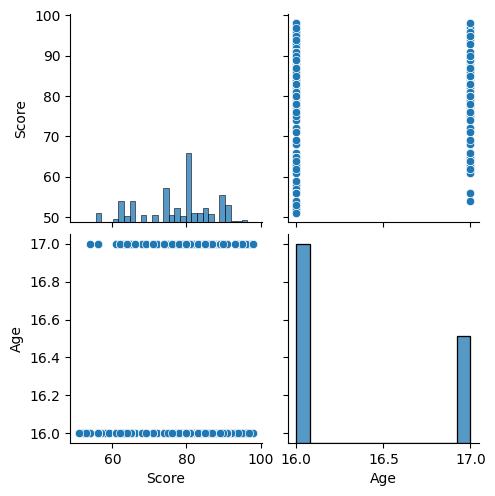

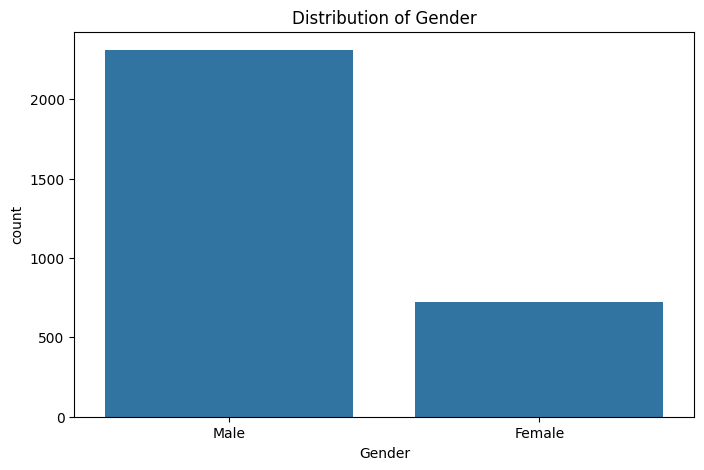

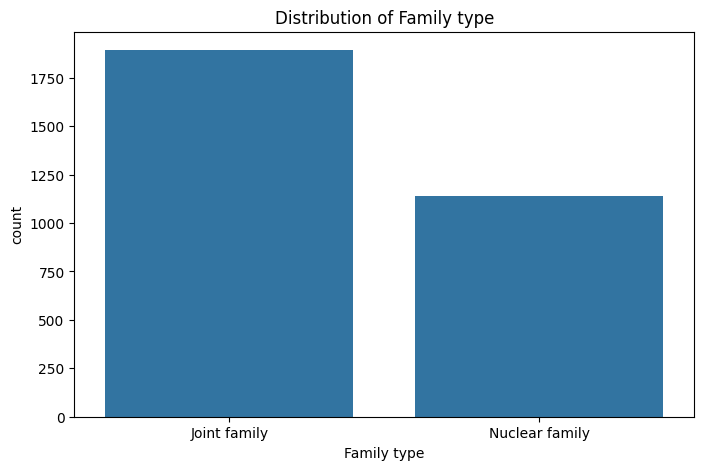

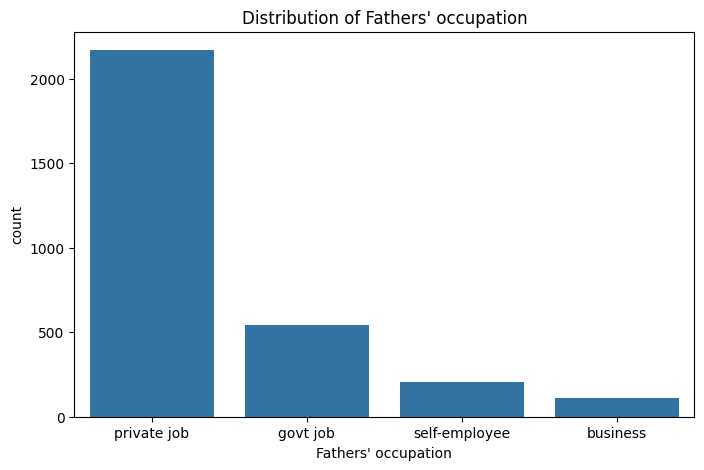

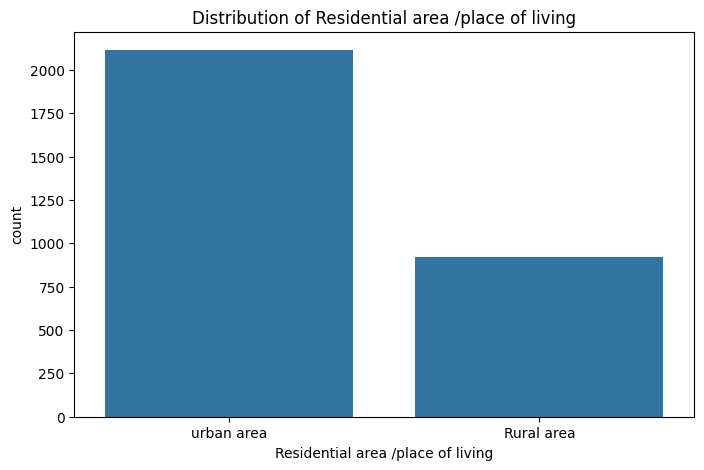

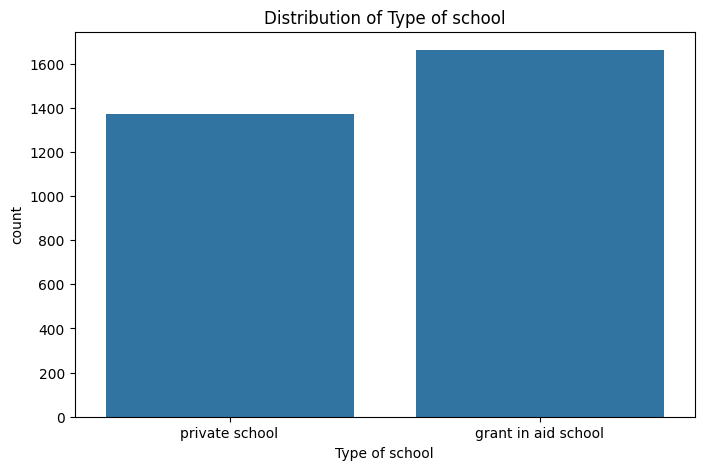

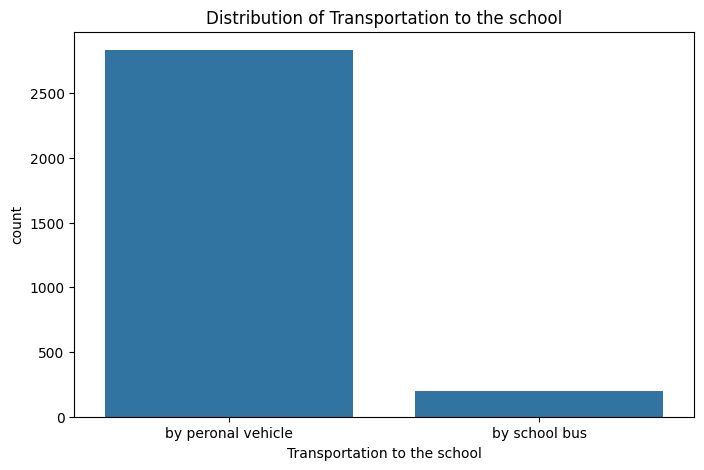

In [7]:
# Pairplot for numerical variables
sns.pairplot(data[['Score', 'Age', 'Family income']])
plt.show()

# Bar plots for categorical variables
for column in ['Gender', 'Family type', 'Fathers\' occupation', 'Residential area /place of living', 'Type of school', 'Transportation to the school']:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

6. **Analysis of Specific Questions:**
   - Answer specific questions related to the dataset.

In [8]:
# Percentage of students attending school regularly
attendance_percentage = (data['1. Are you attending school regularly?'].value_counts() / len(data)) * 100
print(f"Percentage of students attending school regularly: {attendance_percentage[1]:.2f}%")

# Percentage of students who bunk classes regularly
bunk_percentage = (data['2. Do you bunk class regularly?'].value_counts() / len(data)) * 100
print(f"Percentage of students who bunk classes regularly: {bunk_percentage[1]:.2f}%")

# Percentage of students who feel fear to go to school
fear_percentage = (data['3. Are you feel fear to go to school?'].value_counts() / len(data)) * 100
print(f"Percentage of students who feel fear to go to school: {fear_percentage[1]:.2f}%")

Percentage of students attending school regularly: 27.39%
Percentage of students who bunk classes regularly: 14.83%
Percentage of students who feel fear to go to school: 36.98%


7. **Score Distribution by Gender:**
   - Explore how the scores vary between different genders.


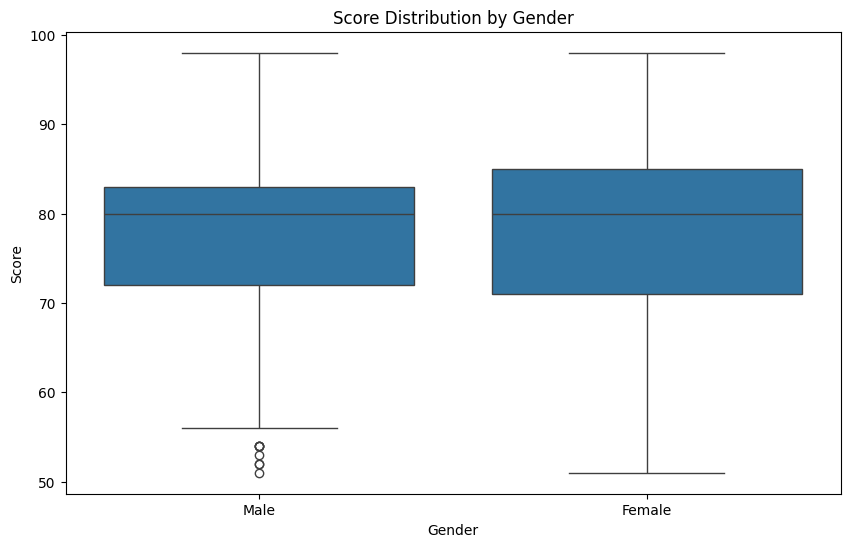

In [9]:
# Boxplot for Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Score', data=data)
plt.title('Score Distribution by Gender')
plt.show()

8. **Family Income vs. Score:**
   - Investigate the relationship between family income and student scores.

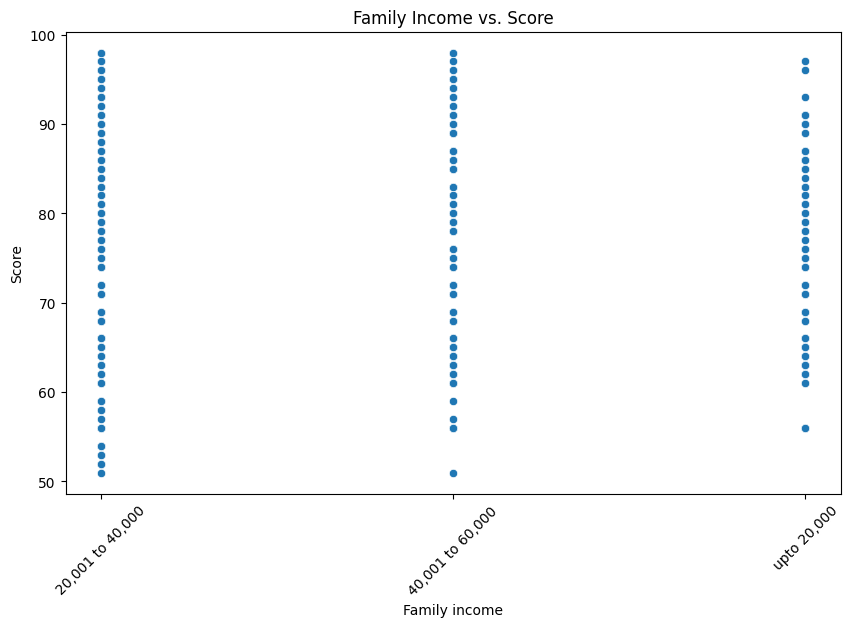

In [10]:
# Scatter plot for Family Income vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Family income', y='Score', data=data)
plt.title('Family Income vs. Score')
plt.xticks(rotation=45)
plt.show()

9. **Age Distribution:**
   - Visualize the distribution of ages in the dataset.


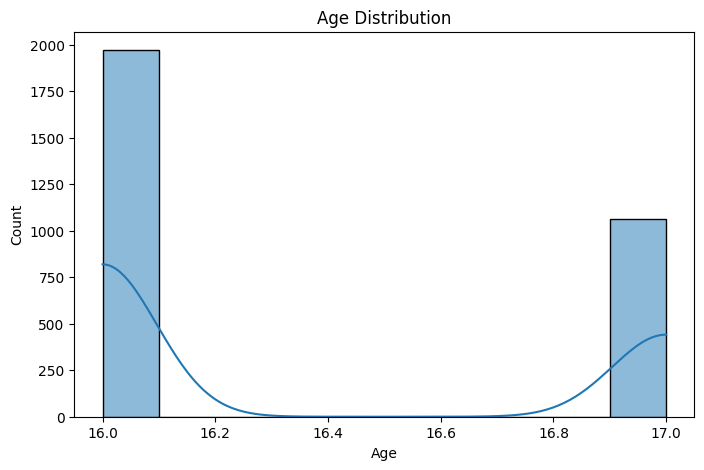

In [11]:
# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

10. **Fathers' Occupation and Score:**
   - Explore how the occupation of fathers correlates with student scores.

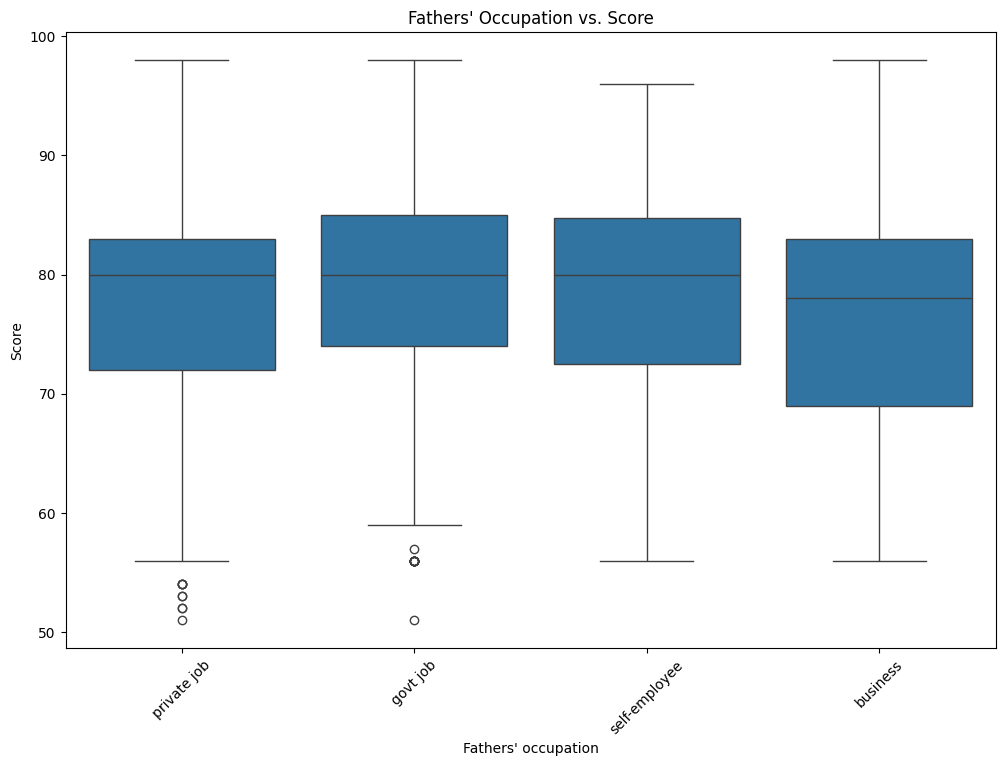

In [12]:
# Boxplot for Fathers' Occupation and Score
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fathers\' occupation', y='Score', data=data)
plt.title('Fathers\' Occupation vs. Score')
plt.xticks(rotation=45)
plt.show()

11. **Fear of Going to School by Family Type:**
   - Analyze if the fear of going to school varies with different family types.

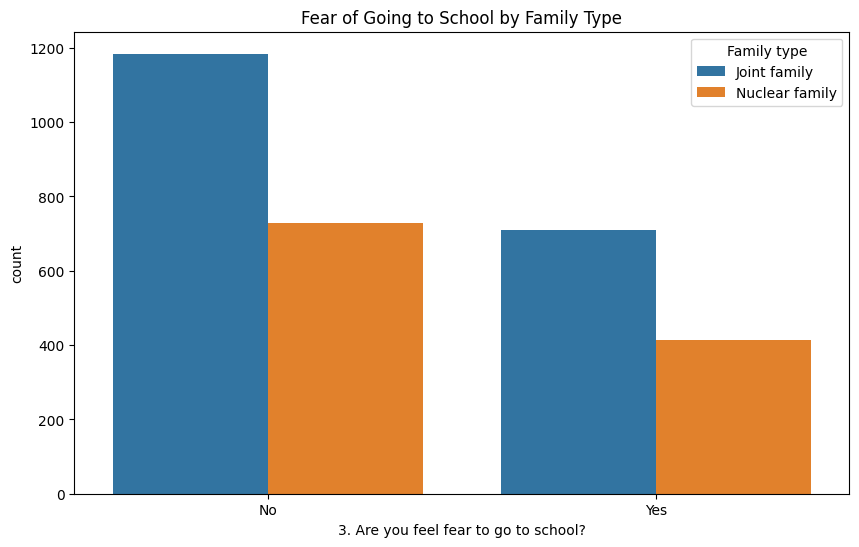

In [13]:
# Countplot for Fear of Going to School by Family Type
plt.figure(figsize=(10, 6))
sns.countplot(x='3. Are you feel fear to go to school?', hue='Family type', data=data)
plt.title('Fear of Going to School by Family Type')
plt.show()

12. **Education Level in Family and Student's Literacy:**
   - Examine how the literacy in the family corresponds to the student's own literacy.

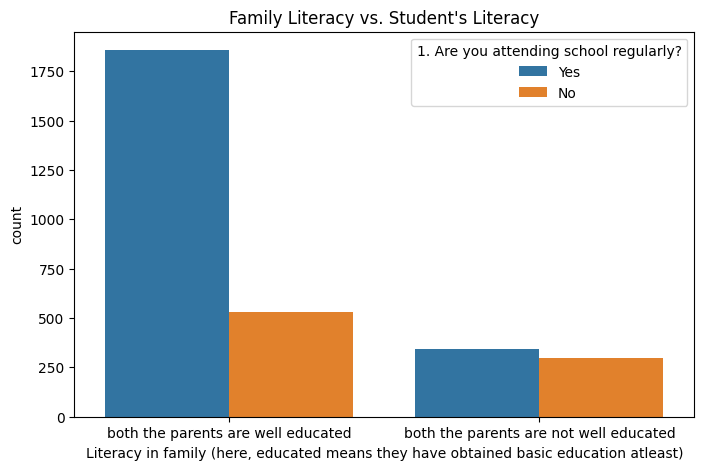

In [14]:
# Countplot for Literacy in Family vs. Student's Literacy
plt.figure(figsize=(8, 5))
sns.countplot(x='Literacy in family (here, educated means they have obtained basic education atleast)', hue='1. Are you attending school regularly?', data=data)
plt.title('Family Literacy vs. Student\'s Literacy')
plt.show()

13. **Correlation Heatmap:**
   - Visualize the correlation between all numerical variables in the dataset.

   as for above code for 3 

14. **Age and Score Relationship:**
   - Analyze the relationship between age and score using a regression plot.

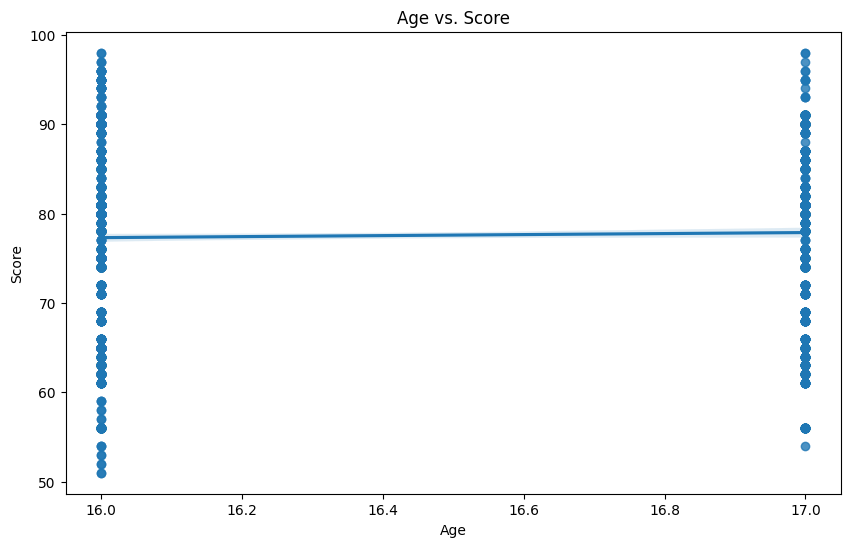

In [15]:
# Regression plot for Age and Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Score', data=data)
plt.title('Age vs. Score')
plt.show()

15. **Income and Education Level Interaction:**
   - Investigate if the interaction between family income and education level in the family has any impact on student scores.

<Figure size 1200x800 with 0 Axes>

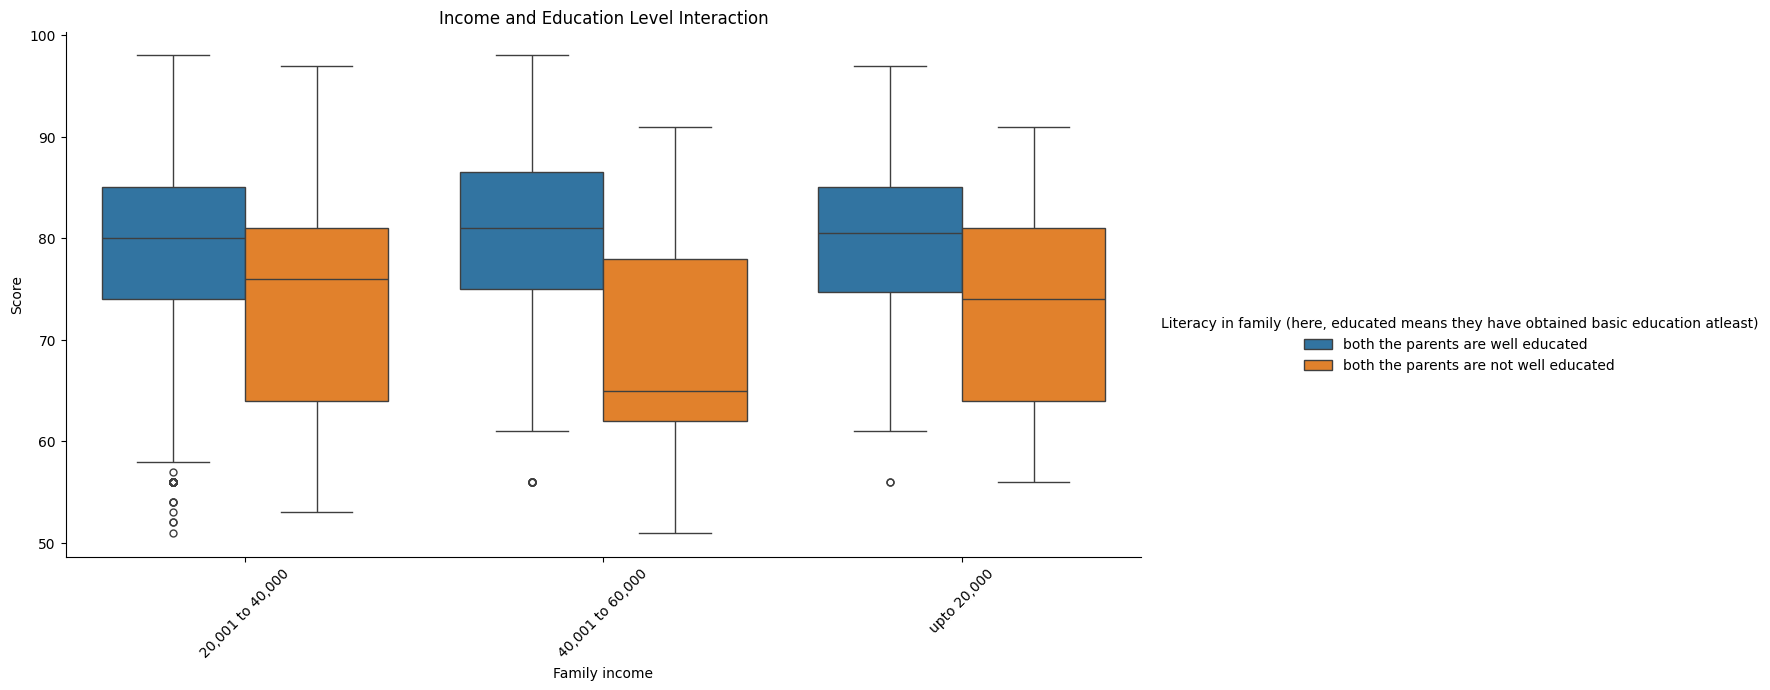

In [16]:
# Catplot for Income and Education Level Interaction
plt.figure(figsize=(12, 8))
sns.catplot(x='Family income', y='Score', hue='Literacy in family (here, educated means they have obtained basic education atleast)', data=data, kind='box', height=6, aspect=2)
plt.title('Income and Education Level Interaction')
plt.xticks(rotation=45)
plt.show()

16. **Comparing Scores Across Different School Types:**
   - Compare student scores across different types of schools.

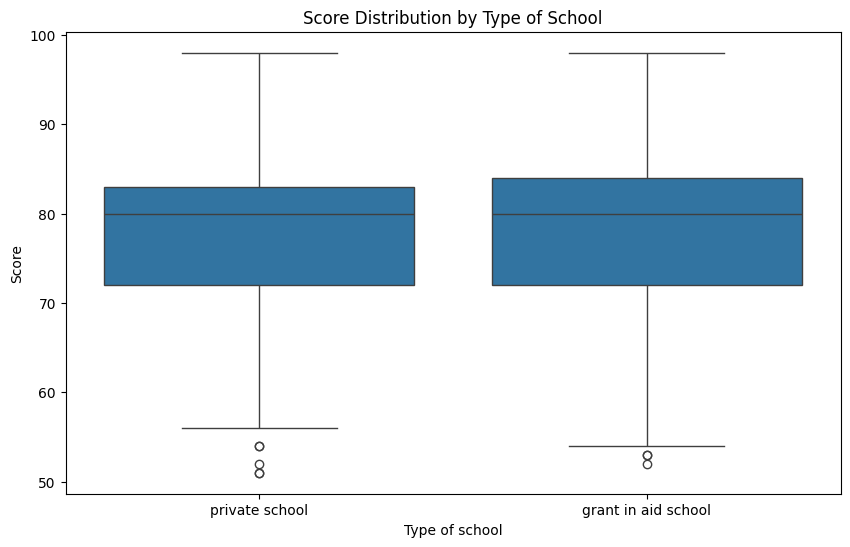

In [17]:
# Boxplot for Score by Type of School
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of school', y='Score', data=data)
plt.title('Score Distribution by Type of School')
plt.show()

17. **Effect of Fear on Attendance:**
   - Analyze how fear of going to school affects regular school attendance.

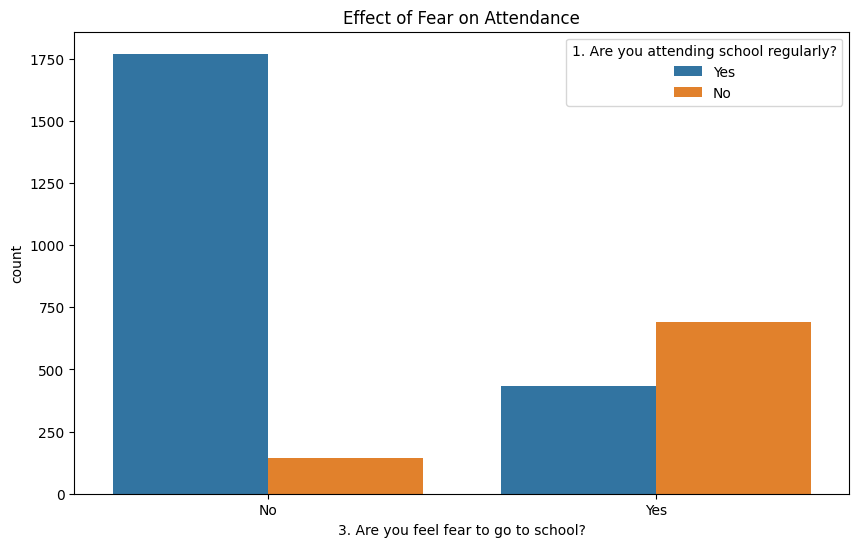

In [18]:
# Countplot for Fear vs. Attendance
plt.figure(figsize=(10, 6))
sns.countplot(x='3. Are you feel fear to go to school?', hue='1. Are you attending school regularly?', data=data)
plt.title('Effect of Fear on Attendance')
plt.show()

18. **Education Level and Bunking Classes:**
   - Investigate if students with different family education levels have different tendencies to bunk classes.

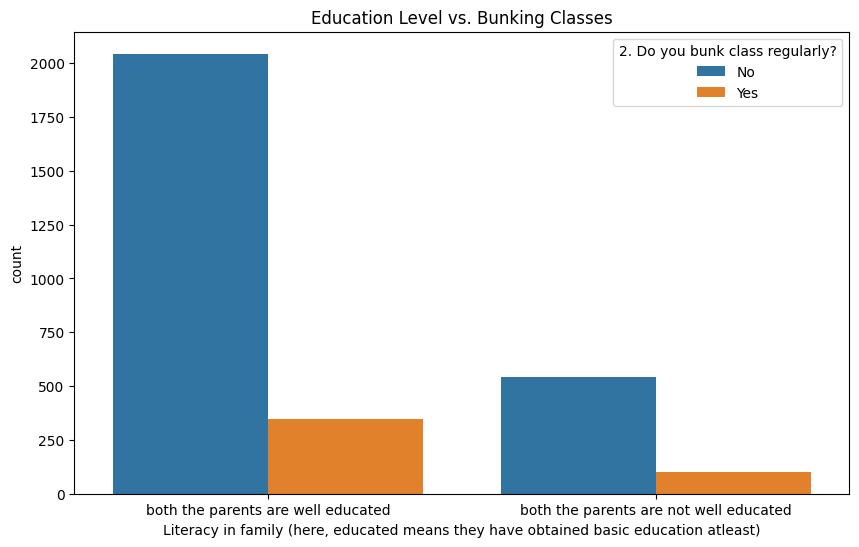

In [19]:
# Countplot for Literacy in Family vs. Bunking Classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Literacy in family (here, educated means they have obtained basic education atleast)', hue='2. Do you bunk class regularly?', data=data)
plt.title('Education Level vs. Bunking Classes')
plt.show()